In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
import os
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

image_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=r"C:\Users\ulzii\OneDrive\Desktop\baba\media",
    labels='inferred',
    label_mode='int',
    batch_size=1,
    image_size=(300, 300),
    color_mode="grayscale",  
)



Found 1004 files belonging to 18 classes.


In [3]:
val_data = []
train_data = []

dataset_size = 1004
k  = 10
fold_size = 100

for i in range(k):
    val = image_data.skip(fold_size*i).take(fold_size)
    train = image_data.take(i * fold_size).concatenate(image_data.skip((i + 1) * fold_size))
    val_data.append(val)
    train_data.append(train)


In [4]:
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(18, activation='softmax')    
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
final_train_accuracies = []
final_val_accuracies = []

for i in range(k):
    print(f"Training Fold {i+1}...")
    train = train_data[i]
    val = val_data[i]
    
    model = create_model()
    history = model.fit(train,
              epochs=15,
              batch_size = 32         )
    scores = model.evaluate(val, verbose=0)

    final_train_accuracies.append(history.history['accuracy'][-1]) 
    final_val_accuracies.append(scores[-1]) 
    


Training Fold 1...
Epoch 1/15
904/904 [==============================] - 9s 6ms/step - loss: 6.5447 - accuracy: 0.4790      
Epoch 2/15
904/904 [==============================] - 5s 6ms/step - loss: 1.0307 - accuracy: 0.7500
Epoch 3/15
904/904 [==============================] - 5s 5ms/step - loss: 0.7157 - accuracy: 0.8285
Epoch 4/15
904/904 [==============================] - 5s 5ms/step - loss: 0.9807 - accuracy: 0.8949
Epoch 5/15
904/904 [==============================] - 5s 5ms/step - loss: 0.4949 - accuracy: 0.8750 
Epoch 6/15
904/904 [==============================] - 5s 5ms/step - loss: 0.1823 - accuracy: 0.9546
Epoch 7/15
904/904 [==============================] - 5s 5ms/step - loss: 0.2078 - accuracy: 0.9591
Epoch 8/15
904/904 [==============================] - 5s 5ms/step - loss: 3.6809 - accuracy: 0.7931 
Epoch 9/15
904/904 [==============================] - 5s 5ms/step - loss: 0.4798 - accuracy: 0.9392 
Epoch 10/15
904/904 [==============================] - 5s 6ms/step - los

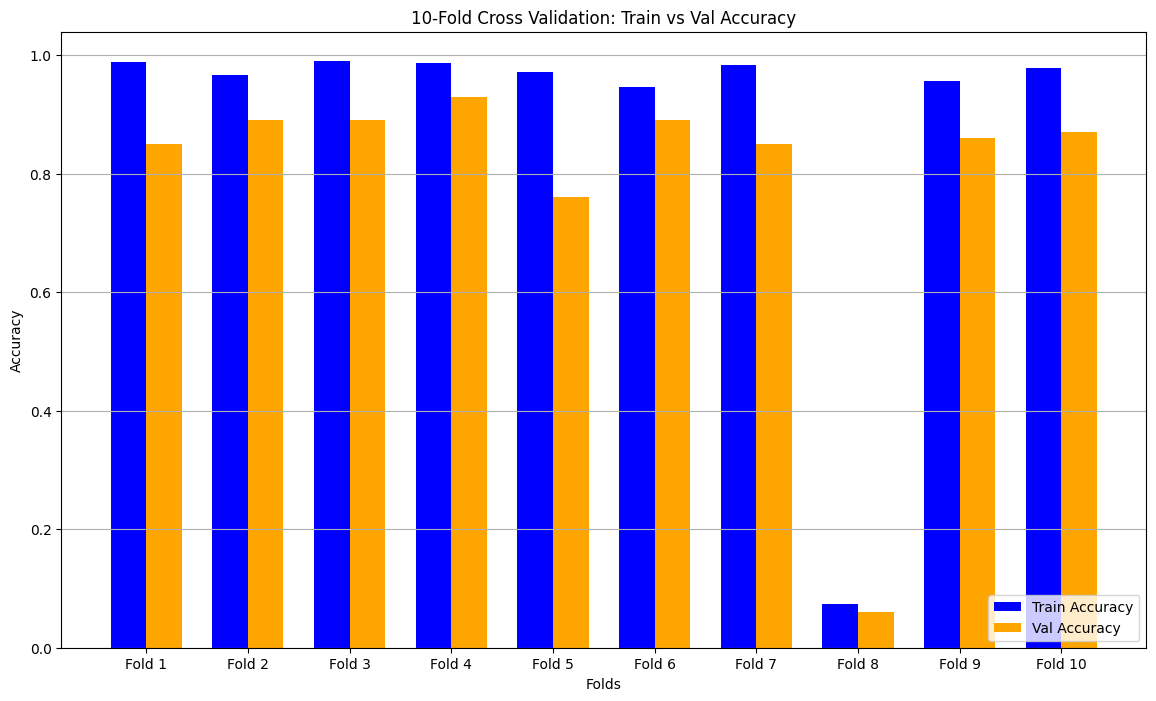

In [6]:
folds = [f'Fold {i+1}' for i in range(10)]

# Create bar positions
x = np.arange(10)  

# Set width for bars
width = 0.35

# Plotting the bar graph
plt.figure(figsize=(14, 8))

# Plotting training accuracies and validation accuracies
plt.bar(x - width/2, final_train_accuracies, width, label='Train Accuracy', color='blue')
plt.bar(x + width/2, final_val_accuracies, width, label='Val Accuracy', color='orange')

# Add labels and title
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.title(f'{10}-Fold Cross Validation: Train vs Val Accuracy')
plt.xticks(x, folds)
plt.legend(loc='lower right')
plt.grid(True, axis='y')
plt.show()

In [7]:
print(final_train_accuracies)

[0.98893803358078, 0.9657079577445984, 0.9900442361831665, 0.9867256879806519, 0.9723451137542725, 0.9457964897155762, 0.9834070801734924, 0.07300885021686554, 0.9568583965301514, 0.9778761267662048]


In [8]:
print(final_val_accuracies)

[0.8500000238418579, 0.8899999856948853, 0.8899999856948853, 0.9300000071525574, 0.7599999904632568, 0.8899999856948853, 0.8500000238418579, 0.05999999865889549, 0.8600000143051147, 0.8700000047683716]


In [9]:
#Different structures
vgg = VGG16(weights="imagenet", include_top=False, input_shape=(300,300,3))

for layer in vgg.layers:
    layer.trainable = True

output = layers.Flatten()(vgg.output)
outputs = layers.Dense(18, activation="softmax")(output)
vgg_model = models.Model(inputs=vgg.input, outputs=outputs)

vgg_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
resnet = ResNet50(weights="imagenet", include_top=False, input_shape=(300,300,3))

for layer in resnet.layers:
    layer.trainable = True
    
output = layers.Flatten()(resnet.output)
outputs = layers.Dense(18, activation="softmax")(output)
resnet_model = models.Model(inputs=resnet.input, outputs=outputs)

resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
#Loading data in 300x300x3 shape or in color since ResNet50 and VGG16 both require 3 channel images
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=r"C:\Users\ulzii\OneDrive\Desktop\baba\media",
    labels='inferred',
    label_mode='int',
    batch_size=5,
    image_size=(300, 300),
    subset = "both",
    validation_split = 0.1,
    seed = 1
)

train_data = test_data[0]

val_data = test_data[1]



Found 1004 files belonging to 18 classes.
Using 904 files for training.
Using 100 files for validation.


In [12]:
resnet_history = resnet_model.fit(train_data, validation_data = val_data, epochs=15, batch_size = 64)

Epoch 1/15
181/181 [==============================] - 24s 105ms/step - loss: 4.2991 - accuracy: 0.6250 - val_loss: 217.3986 - val_accuracy: 0.3100
Epoch 2/15
181/181 [==============================] - 18s 98ms/step - loss: 1.8742 - accuracy: 0.7788 - val_loss: 353.3361 - val_accuracy: 0.0400
Epoch 3/15
181/181 [==============================] - 18s 98ms/step - loss: 1.4111 - accuracy: 0.8551 - val_loss: 4.6791 - val_accuracy: 0.6200
Epoch 4/15
181/181 [==============================] - 18s 98ms/step - loss: 0.8074 - accuracy: 0.9226 - val_loss: 8.4106 - val_accuracy: 0.7100
Epoch 5/15
181/181 [==============================] - 18s 99ms/step - loss: 0.2502 - accuracy: 0.9602 - val_loss: 0.7773 - val_accuracy: 0.9300
Epoch 6/15
181/181 [==============================] - 18s 98ms/step - loss: 0.3187 - accuracy: 0.9701 - val_loss: 10.4166 - val_accuracy: 0.6300
Epoch 7/15
181/181 [==============================] - 18s 98ms/step - loss: 0.1541 - accuracy: 0.9779 - val_loss: 1.2142 - val_acc

In [13]:
train_data_vgg = train_data.map(lambda x, y: (preprocess_input(x), y))
val_data_vgg = val_data.map(lambda x, y: (preprocess_input(x), y))

In [14]:
vgg_history = vgg_model.fit(train_data, validation_data = val_data, epochs=15, batch_size = 64)

Epoch 1/15
181/181 [==============================] - 38s 174ms/step - loss: 75771435078909952.0000 - accuracy: 0.0564 - val_loss: 3.2119 - val_accuracy: 0.0500
Epoch 2/15
181/181 [==============================] - 27s 147ms/step - loss: 3.1296 - accuracy: 0.0664 - val_loss: 2.9766 - val_accuracy: 0.0400
Epoch 3/15
181/181 [==============================] - 27s 147ms/step - loss: 3.0520 - accuracy: 0.0619 - val_loss: 3.0039 - val_accuracy: 0.0500
Epoch 4/15
181/181 [==============================] - 27s 147ms/step - loss: 3.0071 - accuracy: 0.0487 - val_loss: 2.9353 - val_accuracy: 0.0400
Epoch 5/15
181/181 [==============================] - 27s 147ms/step - loss: 2.9806 - accuracy: 0.0597 - val_loss: 2.9587 - val_accuracy: 0.0400
Epoch 6/15
181/181 [==============================] - 27s 147ms/step - loss: 2.9514 - accuracy: 0.0553 - val_loss: 2.9054 - val_accuracy: 0.0500
Epoch 7/15
181/181 [==============================] - 27s 147ms/step - loss: 2.9376 - accuracy: 0.0553 - val_loss:

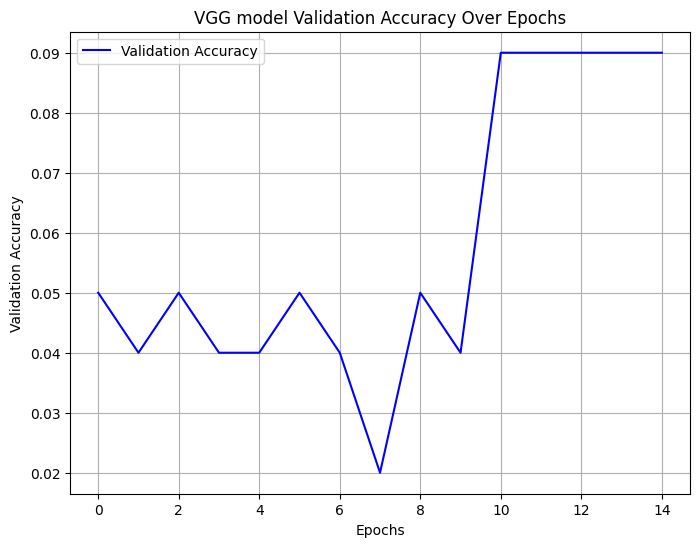

In [15]:
val_accuracy = vgg_history.history['val_accuracy']

# Plot validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(val_accuracy, label='Validation Accuracy', color='blue')
plt.title('VGG model Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

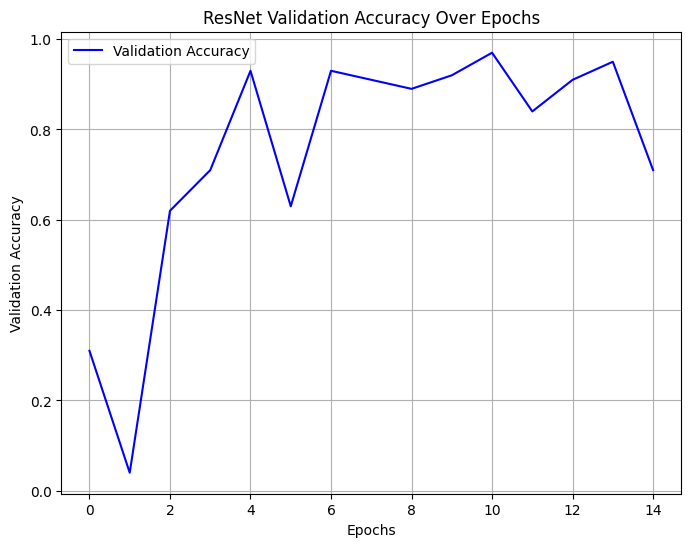

In [16]:
val_accuracy = resnet_history.history['val_accuracy']

# Plot validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(val_accuracy, label='Validation Accuracy', color='blue')
plt.title('ResNet Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
#Correct confusion matrix extraction by Ankit Kumar Saini
#https://stackoverflow.com/questions/64622210/how-to-extract-classes-from-prefetched-dataset-in-tensorflow-for-confusion-matri

y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in image_data:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch, verbose=0)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

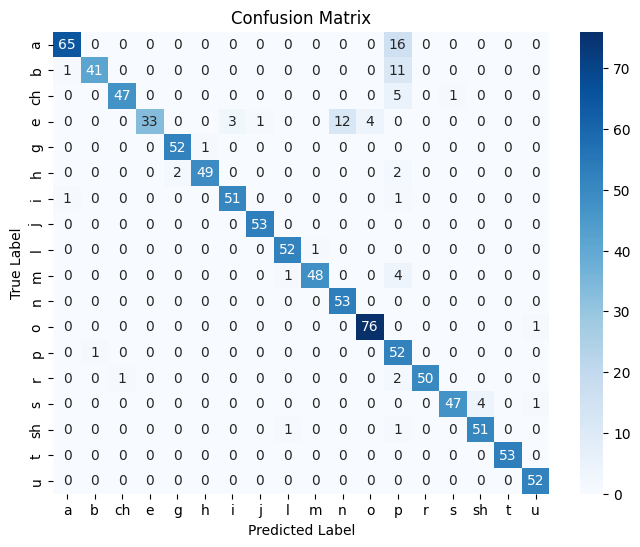

In [22]:
class_names =image_data.class_names
conf_matrix = confusion_matrix(correct_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
model.save("improved_model.h5")